# Erzeugen von Zufallszahlen

## Normalverteilte Zufallszahlen

In [2]:
import numpy

In [3]:
numpy.random.normal(loc=0, scale=1.0)

-0.4759058578244172

In [4]:
A = numpy.random.normal(loc=3, scale=1.0, size=(10000))
A[:5]

array([2.42979828, 3.2750675 , 1.42604029, 3.98121246, 0.90048996])

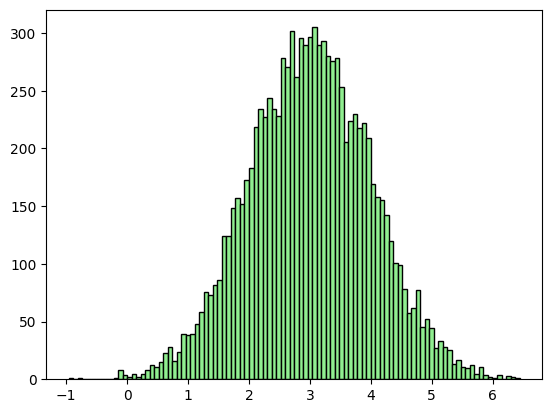

In [5]:
import matplotlib.pyplot as plt
plt.hist(A, bins=100, color="lightgreen", edgecolor="black")
plt.show()

## Gleichverteilte Zufallszahlen

In [9]:
numpy.random.uniform(low=-10, high=+10)

7.355113074029596

In [19]:
A = numpy.random.uniform(low=-10, high=+10, size=(10000))
A[:5]

array([-7.76700278, -2.50852369, -8.10577875, -1.3567337 ,  8.49158284])

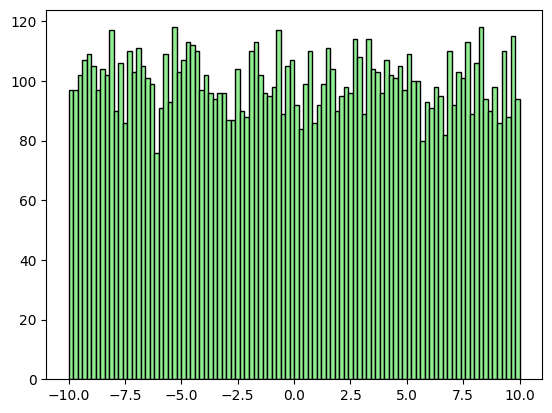

In [22]:
import matplotlib.pyplot as plt
plt.hist(A, bins=100, color="lightgreen", edgecolor="black")
plt.show()

# Simulation eines Abstandssensors mit linearer Kennlinie

## Eine Sensorklasse

In [24]:
class abstandssensor_lineare_kennlinie:
    
    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)
        
    def gib_mir_sensorwert(self, abstand):
        sensorwert = abstand + numpy.random.normal(loc=self.bias, scale=self.noise)
        return sensorwert
    
    def gib_mir_kennlinien_daten(self):
        abstaende = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.gib_mir_sensorwert(abstand)
            abstaende.append(abstand)
            sensorwerte.append(sensorwert)
        return abstaende, sensorwerte
    
    def zeige_sensor_kurve(self):
        abstaende, sensorwerte = self.gib_mir_kennlinien_daten()
        plt.plot(abstaende,sensorwerte)
        plt.xlabel("Tatsächlicher Abstand (Grundwahrheit)")
        plt.ylabel("Sensorwert")
        plt.show()        

In [47]:
s1 = abstandssensor_lineare_kennlinie()

In [48]:
s1.gib_mir_sensorwert(100)

100.17181407221815

In [49]:
s1.bias

6.409630384092964

In [50]:
s1.noise

3.202456596806007

In [51]:
s2 = abstandssensor_lineare_kennlinie()

In [52]:
s2.gib_mir_sensorwert(100)

108.47460356981475

In [53]:
s2.bias

6.377041445977529

In [54]:
s2.noise

2.0732965310359543

## Sensorkurven

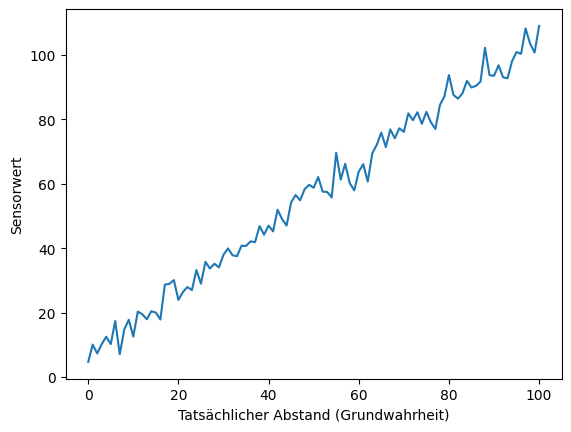

In [55]:
s1.zeige_sensor_kurve()

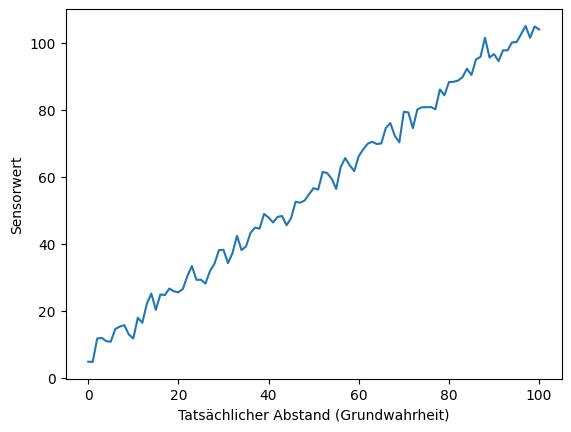

In [56]:
s2.zeige_sensor_kurve()

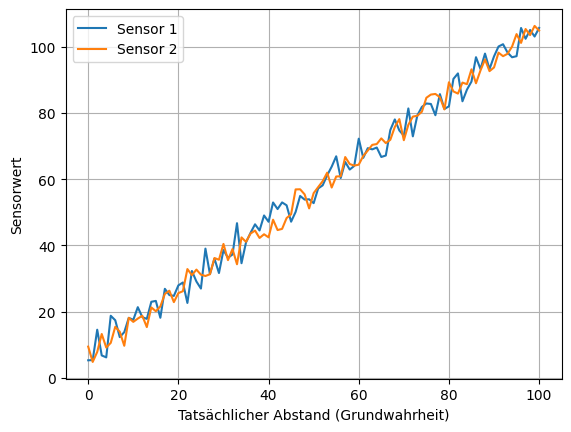

In [57]:
a1,sw1 = s1.gib_mir_kennlinien_daten()
a2,sw2 = s2.gib_mir_kennlinien_daten()
plt.plot(a1,sw1, label="Sensor 1")
plt.plot(a2,sw2, label="Sensor 2")
plt.xlabel("Tatsächlicher Abstand (Grundwahrheit)")
plt.ylabel("Sensorwert")
plt.legend()
plt.grid()
plt.show() 

# Fehlerfunktion für Fusionsergebnisse

In [80]:
gw = numpy.array([1,2,3,4,5])
sensorwerte = numpy.array([0.5, 2.5, 2.5, 4.5, 5.5])

In [81]:
numpy.mean(abs(gw - sensorwerte))

0.5

In [82]:
numpy.around( [0.009, 1.777, 2.12345, 3.567], 2 )

array([0.01, 1.78, 2.12, 3.57])

In [83]:
def MAE(gw, sensorwerte):
    MAE = numpy.mean(abs(gw - sensorwerte))
    return numpy.around(MAE,2)

In [84]:
MAE(gw, sensorwerte)

0.5

# Erster Versuch eines Fusionsansatzes (Mittelwertbildung)

## Fehler bei Verwendung nur von Sensor 1

In [92]:
def erzeuge_messreihe(s, N):
    gw = []
    sensorwerte = []
    for abstand in range(0,N):
        sensorwert = s.gib_mir_sensorwert(abstand)
        gw.append(abstand)
        sensorwerte.append(sensorwert)
        
    return numpy.array(gw), numpy.array(sensorwerte)

In [96]:
gw, sensorwerte1 = erzeuge_messreihe(s1,1000)

In [108]:
gw.shape

(1000,)

In [110]:
sensorwerte1.shape

(1000,)

In [97]:
gw[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [98]:
sensorwerte1[:10]

array([ 1.88114252,  5.09547691,  4.84592318,  8.92533012,  6.317658  ,
       17.92125515, 13.71858767,  6.94891913, 15.70804746, 13.8269768 ])

In [99]:
MAE(gw, sensorwerte1)

6.51

In [104]:
s1.bias

6.409630384092964

## Fehler bei Verwendung nur von Sensor 2

In [100]:
gw, sensorwerte2 = erzeuge_messreihe(s2, 1000)

In [101]:
gw[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [102]:
sensorwerte2[:10]

array([ 5.46855528,  6.83555731,  5.75833193,  9.66928204, 12.50627344,
       11.32079141, 14.72178968, 14.20110965, 16.37770405, 16.93124458])

In [103]:
MAE(gw, sensorwerte2)

6.4

In [105]:
s2.bias

6.377041445977529

## Sensorfusion über einfache Mittelwertbildung bringt es i.d.R. nicht!

In [111]:
sensorwerte1[:10]

array([ 1.88114252,  5.09547691,  4.84592318,  8.92533012,  6.317658  ,
       17.92125515, 13.71858767,  6.94891913, 15.70804746, 13.8269768 ])

In [112]:
sensorwerte2[:10]

array([ 5.46855528,  6.83555731,  5.75833193,  9.66928204, 12.50627344,
       11.32079141, 14.72178968, 14.20110965, 16.37770405, 16.93124458])

In [121]:
sensorwerte_fusioniert = (sensorwerte1+sensorwerte2)/2
sensorwerte_fusioniert[:10]

array([ 3.6748489 ,  5.96551711,  5.30212756,  9.29730608,  9.41196572,
       14.62102328, 14.22018867, 10.57501439, 16.04287575, 15.37911069])

In [122]:
MAE(gw, sensorwerte_fusioniert)

6.43

# Zweiter Versuch eins Fusionsansatzes (Mittelwertbildung + Biaskorrektur)

In [125]:
# Wie kann man den Bias korrigieren?
# Experimentell: durch Berechnung der mittleren Abweichung
def ME(gw, sensorwerte):
    ME = numpy.mean(gw - sensorwerte)
    return ME

In [126]:
bias1 = ME(gw,sensorwerte1)
bias1

-6.468768167624247

In [127]:
bias2 = ME(gw,sensorwerte2)
bias2

-6.396146286308755

In [128]:
sensorwerte1[:5]

array([1.88114252, 5.09547691, 4.84592318, 8.92533012, 6.317658  ])

In [129]:
(sensorwerte1+bias1)[:5]

array([-4.58762565, -1.37329125, -1.62284499,  2.45656195, -0.15111017])

In [132]:
MAE(gw, sensorwerte1+bias1)

2.65

In [134]:
MAE(gw, sensorwerte2+bias2)

1.67

In [135]:
sensorwerte_fusioniert = ((sensorwerte1+bias1) + (sensorwerte2+bias2))/2

In [136]:
MAE(gw,sensorwerte_fusioniert)

1.5

# Experiment: Immer mehr Sensoren

In [215]:
def exp(ANZ_SENSOREN=3, zeige_details=True) -> float:

    # 1. Erzeuge Sensoren
    alle_sensoren = []
    for sid in range(ANZ_SENSOREN):
        s = abstandssensor_lineare_kennlinie()
        if zeige_details:
            print(f"Sensor #{sid}: bias={s.bias:.2f}, noise={s.noise:.2f}")
        alle_sensoren.append( s )

    # 2. Simuliere Messungen zur Bestimmung der Biaskorrekturwerte
    #    und bereite Sensor-spezifische Bias-Korrekturwerte vor
    alle_biase = []
    for sid in range(ANZ_SENSOREN):
        gw, sensorwerte = erzeuge_messreihe(alle_sensoren[sid],1000)
        bias = ME(gw,sensorwerte)
        alle_biase.append( bias )

    # 3. Simuliere jetzt Messungen in der Anwendung
    alle_sensorwerte = []
    for sid in range(ANZ_SENSOREN):
        gw, sensorwerte = erzeuge_messreihe(alle_sensoren[sid],1000)
        alle_sensorwerte.append( sensorwerte )
        if zeige_details:            
            print(f"Fehler bei Verwendung nur von Sensor #{sid}: {MAE(gw,sensorwerte)}")

    # 4. Fusion
    fusionierte_werte = numpy.zeros(1000)
    for sid in range(ANZ_SENSOREN):
        fusionierte_werte += alle_sensorwerte[sid] + alle_biase[sid]
    fusionierte_werte /= ANZ_SENSOREN
    fusionsfehler = MAE(gw,fusionierte_werte)
    print(f"Fehler bei Fusion mit {ANZ_SENSOREN} Sensoren: {fusionsfehler}")
    
    return fusionsfehler

exp(3)
#exp(3, zeige_details=False)

Sensor #0: bias=9.08, noise=2.47
Sensor #1: bias=9.46, noise=2.10
Sensor #2: bias=-7.02, noise=4.55
Fehler bei Verwendung nur von Sensor #0: 9.02
Fehler bei Verwendung nur von Sensor #1: 9.41
Fehler bei Verwendung nur von Sensor #2: 7.17
Fehler bei Fusion mit 3 Sensoren: 1.54


1.54

In [216]:
alle_sensoren

In [217]:
alle_biase

[9.072278870014518,
 -8.326727950653954,
 7.43994544532005,
 -8.603484191983567,
 -7.509655355770777,
 -1.191507369980969,
 5.784975924676453,
 7.427796468622711,
 5.04562438779876]

In [218]:
for sensorwerte in alle_sensorwerte:
    print(sensorwerte.shape)

(1000,)
(1000,)
(1000,)


Fehler bei Fusion mit 2 Sensoren: 2.2
Fehler bei Fusion mit 3 Sensoren: 1.39
Fehler bei Fusion mit 4 Sensoren: 1.44
Fehler bei Fusion mit 5 Sensoren: 1.27
Fehler bei Fusion mit 6 Sensoren: 1.09
Fehler bei Fusion mit 7 Sensoren: 0.69
Fehler bei Fusion mit 8 Sensoren: 0.94
Fehler bei Fusion mit 9 Sensoren: 1.04
Fehler bei Fusion mit 10 Sensoren: 0.73
Fehler bei Fusion mit 11 Sensoren: 0.74
Fehler bei Fusion mit 12 Sensoren: 0.72
Fehler bei Fusion mit 13 Sensoren: 0.73
Fehler bei Fusion mit 14 Sensoren: 0.78
Fehler bei Fusion mit 15 Sensoren: 0.74
Fehler bei Fusion mit 16 Sensoren: 0.64
Fehler bei Fusion mit 17 Sensoren: 0.54
Fehler bei Fusion mit 18 Sensoren: 0.62
Fehler bei Fusion mit 19 Sensoren: 0.66


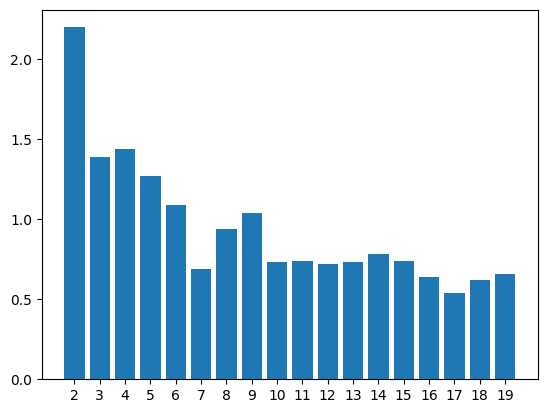

In [221]:
sensoranzahlen = []
alle_fusionsfehler = []
for ANZ_SENSOREN in range(2,20):
    fusionsfehler = exp(ANZ_SENSOREN, zeige_details=False)
    sensoranzahlen.append(ANZ_SENSOREN)
    alle_fusionsfehler.append( fusionsfehler )

import matplotlib.pyplot as plt
plt.bar(sensoranzahlen, alle_fusionsfehler)
plt.xticks(sensoranzahlen)
plt.show()

# Simulation eines Abstandssensors mit nicht-linearer Kennlinie

## Der Logarithmus ist eine nicht-lineare Funktion

In [ ]:
x = numpy.arange(1,1001)
x[:100]

In [ ]:
y = numpy.log(x)
y[:100]

In [ ]:
#plt.scatter(x,y, marker="+")
plt.plot(x,y)
plt.show()

## Eine neue Sensor-Klasse

In [ ]:
class sensor_nichtlineare_kennlinie:
    
    def __init__(self, bias, noise):
        self.bias = bias
        self.noise = noise
        
    def get_sensorwert(self, x):        
        sensorwert = x + numpy.random.normal(loc=self.bias, scale=self.noise) + 500*numpy.log(1+x)
        return sensorwert
    
    def zeige_sensor_kurve(self):
        gw = []
        sensorwerte = []
        for x in range(0,1001):
            sensorwert = self.get_sensorwert(x)
            gw.append(x)
            sensorwerte.append(sensorwert)
        plt.plot(gw,sensorwerte)
        plt.xlabel("gw (Grundwahrheit)")
        plt.ylabel("Sensorwert")
        plt.show()   

In [ ]:
s5 = sensor_nichtlineare_kennlinie(50,20)

In [ ]:
s5.zeige_sensor_kurve()

In [ ]:
s6 = sensor_nichtlineare_kennlinie(-100,80)

In [ ]:
s6.zeige_sensor_kurve()

# Neuer Fusionsansatz

## Inverses Sensormodell (ISM)

In [ ]:
gw = []
mittlere_sensorwerte = []

ism_s6 = {}

for x in range(0,1001):    
    sensorwerte = []
    for run in range(0,50):
        sensorwert = s6.get_sensorwert(x)
        sensorwerte.append( sensorwert )
    mittlerer_sensorwert = numpy.mean(sensorwerte)
    
    gw.append(x)
    mittlere_sensorwerte.append( mittlerer_sensorwert )
    
    ism_s6[mittlerer_sensorwert] = x

In [ ]:
gw[:10]

In [ ]:
mittlere_sensorwerte[:10]

In [ ]:
list( ism_s6.items() ) [:10]

In [ ]:
plt.plot(gw, mittlere_sensorwerte)
plt.show()

In [ ]:
class ism:
    
    def __init__(self, s):
        self.sensor = s
        
    def baue_lut_auf(self):        
        self.lut = {}
        for x in range(0,1001):
            sensorwerte = []
            for run in range(0,50):
                sensorwert = self.sensor.get_sensorwert(x)
                sensorwerte.append( sensorwert )
            mittlerer_sensorwert = numpy.mean(sensorwerte)
            self.lut[mittlerer_sensorwert] = x
            
    def sensorwert_zu_entfernung(self, sensorwert):
        min_dist = None
        best_key = None
        for key in self.lut:
            dist = abs(sensorwert - key)
            if best_key==None or dist < min_dist:
                best_key = key
                min_dist = dist
        
        beste_entfernungs_schaetzung = self.lut[best_key]
        return beste_entfernungs_schaetzung

In [ ]:
ism_s6 = ism(s6)
ism_s6.baue_lut_auf()

In [ ]:
sensorwert = -102
min_dist = None
best_key = None
for key in ism_s6.lut:
    dist = abs(sensorwert - key)
    if best_key==None or dist < min_dist:
        best_key = key
        min_dist = dist

In [ ]:
best_key

In [ ]:
ism_s6.lut[best_key]

In [ ]:
ism_s6.sensorwert_zu_entfernung( sensorwert )

## Sensordatenfusion über inverse Sensormodelle

In [ ]:
s5 = sensor_nichtlineare_kennlinie(50,5)
s6 = sensor_nichtlineare_kennlinie(-100,20)

ism_s5 = ism(s5)
ism_s5.baue_lut_auf()

ism_s6 = ism(s6)
ism_s6.baue_lut_auf()

In [ ]:
gw = []
sensorwerte_s5 = []
sensorwerte_s6 = []
fusions_ergebnisse = []

for x in range(0,1001):
    sensorwert5 = s5.get_sensorwert(x)
    sensorwert6 = s6.get_sensorwert(x)

    e5 = ism_s5.sensorwert_zu_entfernung(sensorwert5)
    e6 = ism_s6.sensorwert_zu_entfernung(sensorwert6)

    fusionierte_finale_entfernungs_schaetzung = (e5+e6) / 2
    
    gw.append(x)
    sensorwerte_s5.append(sensorwert5)
    sensorwerte_s6.append(sensorwert6)
    fusions_ergebnisse.append(fusionierte_finale_entfernungs_schaetzung)

In [ ]:
plt.plot(gw, sensorwerte_s5)
plt.plot(gw, sensorwerte_s6)
plt.show()

In [ ]:
plt.plot(gw, gw)
plt.plot(gw, fusions_ergebnisse)
plt.show()

# Simulation eines echt fiesen Abstandssensors

## Seltsame Kennlinie erzeugen

In [ ]:
bias = -50
noise = 20
pos = 500

gw = []
sensorwerte = []
for x in range(0,1001):
    sensorwert = x + 50*numpy.sin(x/10) + numpy.random.normal(loc=bias, scale=noise) + ((x-pos)/20)**2
    
    gw.append(x)
    sensorwerte.append(sensorwert)
    
plt.plot(gw,sensorwerte)
plt.show()

## Neue Sensorklasse

In [ ]:
class sensor_strange:
    
    def __init__(self, bias, noise, pos):
        self.bias = bias
        self.noise = noise
        self.pos = pos
        
    def get_sensorwert(self, x):        
        sensorwert = x + 50*numpy.sin(x/10) + numpy.random.normal(loc=bias, scale=noise) + ((x-self.pos)/20)**2
        return sensorwert
    
    def zeige_sensor_kurve(self):
        gw = []
        sensorwerte = []
        for x in range(0,1001):
            sensorwert = self.get_sensorwert(x)
            gw.append(x)
            sensorwerte.append(sensorwert)
        plt.plot(gw,sensorwerte)
        plt.xlabel("gw (Grundwahrheit)")
        plt.ylabel("Sensorwert")
        plt.show() 

In [ ]:
s7 = sensor_strange(-50,20,400)
s7.zeige_sensor_kurve()

In [ ]:
s8 = sensor_strange(-50,20,800)
s8.zeige_sensor_kurve()

# Eine lernende Sensordatenfusion

## Einleitung: Wieso Machine Learning?

Problem / Herausforderung: wir müssen nun damit umgehen, dass ein "einfaches" Inverses Sensormodell (ISM) nicht mehr möglich ist.

Der Messwert "300" bei Sensor 7 kann nämlich bei mehreren verschiedenen Distanzen vorkommen.

Aber wir haben ja auch noch den Sensor 8, der gleichzeitig auch einen Sensorwert liefert. Dieser Sensorwert kann als weitere Hilfsquelle zur Auflösung von Mehrdeutigkeiten verwendet werden.

Wir lernen dazu über "Machine Learning" ein Inverses Sensor Modell, das einen Messvektor **z** auf einen Zustandsvektor **x** abbildet.

## Vorbereiten der Beispieldaten fürs Machine Learning

In [ ]:
X = numpy.zeros( (1000,2) )
Y = numpy.zeros( (1000,1) )

i = 0
for e in range(0,1000):
    sensorwert_s7 = s7.get_sensorwert(e)
    sensorwert_s8 = s8.get_sensorwert(e)
    
    X[i,:] = numpy.array( [sensorwert_s7, sensorwert_s8] )
    Y[i,0] = e
    
    i += 1

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
X[0:5]

In [ ]:
Y[0:5]

## Beispieldaten aufspalten in Trainings- und Testdaten

In [ ]:
# Aufspaltung in Trainings- und Testdaten
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape

In [ ]:
x_train[0:5]

In [ ]:
y_train[0:5]

In [ ]:
x_test.shape

In [ ]:
y_test.shape

## Machine Learning mittels scikit-learn

In [ ]:
# k-NN Regressor erlernen
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3, weights="uniform")
knn = knn.fit(x_train, y_train)

## Testen der Modellgüte

In [ ]:
y_pred_test = knn.predict( x_test )

In [ ]:
y_pred_test[0:5]

In [ ]:
y_test[0:5]

In [ ]:
y_pred_test.shape

In [ ]:
y_test.shape

In [ ]:
plt.scatter(y_test.flatten(), y_pred_test.flatten())
plt.xlabel("Ground Truth Distanz")
plt.ylabel("Prädizierte Distanz")
plt.show()

In [ ]:
MAE( y_test.flatten(), y_pred_test.flatten() )

# Lernende Ansätze zur Fusion von Sensordaten unterschiedlicher Ranges

## Eine neue Sensorklasse

In [ ]:
class sensor_strange_range:
    
    def __init__(self, bias, noise, pos, fac):
        self.bias = bias
        self.noise = noise
        self.pos = pos
        self.fac = fac
        
    def get_sensorwert(self, x):        
        sensorwert = self.fac * (x + 50*numpy.sin(x/10) + numpy.random.normal(loc=bias, scale=noise) + ((x-self.pos)/20)**2)
        return sensorwert
    
    def zeige_sensor_kurve(self):
        gw = []
        sensorwerte = []
        for x in range(0,1001):
            sensorwert = self.get_sensorwert(x)
            gw.append(x)
            sensorwerte.append(sensorwert)
        plt.plot(gw,sensorwerte)
        plt.xlabel("gw (Grundwahrheit)")
        plt.ylabel("Sensorwert")
        plt.show() 

In [ ]:
s9  = sensor_strange_range(-50,20,400, 1)
s10 = sensor_strange_range(-50,20,800, 100)

In [ ]:
s9.zeige_sensor_kurve()

In [ ]:
s10.zeige_sensor_kurve()

## Machine Learning Reloaded

In [ ]:
# 1. Beispieldaten fürs ML vorbereiten
X = numpy.zeros( (1000,2) )
Y = numpy.zeros( (1000,1) )
i = 0
for e in range(0,1000):
    sensorwert_s9  = s9.get_sensorwert(e)
    sensorwert_s10 = s10.get_sensorwert(e)    
    X[i,:] = numpy.array( [sensorwert_s9, sensorwert_s10] )
    Y[i,0] = e    
    i += 1


# 2. Beispieldaten in Trainings- und Testdaten aufteilen
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


# 3. k-NN Regressor erlernen
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3, weights="uniform")
knn = knn.fit(x_train, y_train)


# 4. Modellgüte ermitteln
y_pred_test = knn.predict( x_test )


# 5. Plotten der Prädiktionen
plt.scatter(y_test.flatten(), y_pred_test.flatten())
plt.show()


# 6. Quantitative Auswertung des mittleren Fehlers
print( "MAE=", MAE( y_test.flatten(), y_pred_test.flatten() ) )

Man sieht, dass der Fehler deutlich größer geworden ist! Der Grund ist, dass der k-NN Regressor nun nicht mehr mit dem Standardabstandsmaß (euklidische Maß) funktioniert. Wir müssen dazu vorher die Sensormesswerte normalisieren!

## Normalisierung

In [ ]:
D = numpy.array( [[-20,-2],
                  [-10,-1],
                  [  0, 0],
                  [+10,+1],
                  [+20,+2]] )

In [ ]:
D

In [ ]:
numpy.mean( D[:,0] )

In [ ]:
numpy.std( D[:,0] )

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
D_scaled = scaler.fit_transform(D)

In [ ]:
D_scaled

In [ ]:
D_scaled[:,0]

In [ ]:
numpy.mean( D_scaled[:,0] )

In [ ]:
numpy.std( D_scaled[:,0] )

## Jetzt ML mit Skalierung der Sensordaten

In [ ]:
# 1. Beispieldaten fürs ML vorbereiten
X = numpy.zeros( (1000,2) )
Y = numpy.zeros( (1000,1) )
i = 0
for e in range(0,1000):
    sensorwert_s9  = s9.get_sensorwert(e)
    sensorwert_s10 = s10.get_sensorwert(e)    
    X[i,:] = numpy.array( [sensorwert_s9, sensorwert_s10] )
    Y[i,0] = e    
    i += 1


# 2. Beispieldaten in Trainings- und Testdaten aufteilen
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


# 3. Skalierung der Trainings- und Testdaten
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)


# 4. k-NN Regressor erlernen
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3, weights="uniform")
knn = knn.fit(x_train_scaled, y_train)


# 5. Modellgüte ermitteln
y_pred_test = knn.predict( x_test_scaled )


# 6. Plotten der Prädiktionen
plt.scatter(y_test.flatten(), y_pred_test.flatten())
plt.show()


# 7. Quantitative Auswertung des mittleren Fehlers
fehler = MAE( y_test.flatten(), y_pred_test.flatten() )
print( f"MAE = {fehler:.2f}cm" )

Wir konnten jetzt den mittleren absoluten Schätzfehler zur Entfernungsschätzung auf Basis zweier Sensorwerte wieder auf ca. 10cm reduzieren.

# Mehrere Sensoren erzeugen

In [ ]:
bias = numpy.random.uniform(low=-100, high=100)
var  = numpy.random.uniform(low=1, high=100)
pos  = numpy.random.uniform(low=1, high=1000)
fac  = numpy.random.uniform(low=1, high=100)
bias, var, pos, fac

In [ ]:
nr_sensors = 3
for sensor_nr in range(nr_sensors):
    bias = numpy.random.uniform(low=-100, high=100)
    var  = numpy.random.uniform(low=1, high=100)
    pos  = numpy.random.uniform(low=1, high=1000)
    fac  = numpy.random.uniform(low=1, high=100)
    s = sensor_strange_range(bias, var, pos, fac)
    s.zeige_sensor_kurve()

In [ ]:
def erzeuge_sensoren(nr_sensors, diagrams=True):
    sensors = []
    for sensor_nr in range(nr_sensors):
        bias = numpy.random.uniform(low=-100, high=100)
        var  = numpy.random.uniform(low=1, high=100)
        pos  = numpy.random.uniform(low=1, high=1000)
        fac  = numpy.random.uniform(low=1, high=100)
        s = sensor_strange_range(bias, var, pos, fac)
        if diagrams:
            s.zeige_sensor_kurve()        
        sensors.append(s)
    return sensors

# Sensordatenfusion mit steigender Anzahl von Sensoren

In [ ]:
def experiment(nr_sensors, diagrams=False):

    # 1. Erzeuge Sensoren
    sensors = erzeuge_sensoren(nr_sensors, diagrams)

    # 2. Beispieldaten fürs ML vorbereiten
    X = numpy.zeros( (1000,nr_sensors) )
    Y = numpy.zeros( (1000,1) )
    i = 0
    for e in range(0,1000):

        for sensor_nr, sensor in enumerate(sensors):
            sensorwert = sensor.get_sensorwert(e)
            X[i,sensor_nr] = sensorwert

        Y[i,0] = e    
        i += 1


    # 2. Beispieldaten in Trainings- und Testdaten aufteilen
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


    # 3. Skalierung der Trainings- und Testdaten
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled  = scaler.transform(x_test)


    # 4. k-NN Regressor erlernen
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor(n_neighbors=3, weights="uniform")
    knn = knn.fit(x_train_scaled, y_train)


    # 5. Modellgüte ermitteln
    y_pred_test = knn.predict( x_test_scaled )


    # 6. Plotten der Prädiktionen
    if diagrams:
        plt.scatter(y_test.flatten(), y_pred_test.flatten())
        plt.show()


    # 7. Quantitative Auswertung des mittleren Fehlers
    fehler = MAE( y_test.flatten(), y_pred_test.flatten() )
    print( f"nr_sensors={nr_sensors} -> MAE = {fehler:.2f}cm" )
    return fehler

In [ ]:
ergebnisse_x = []
ergebnisse_y = []
for nr_sensors in range(2,11):
    
    alle_fehler = []
    for run in range(50):
        fehler = experiment(nr_sensors)
        alle_fehler.append(fehler)
        
    ergebnisse_x.append( nr_sensors )
    ergebnisse_y.append( numpy.mean(alle_fehler) )

In [ ]:
plt.scatter(ergebnisse_x, ergebnisse_y, marker=".")
plt.show()